# Python 資料科學期末專題 (二)

[提示]

用 Pandas 讀入時有時需要注意 encoding 參數

1. 引入 Pandas Profiling

1. 需要注意異常值與缺失值的處理, 注意資料區間, 評估值區間差異過大的問題

1. 資料的分類, 以期可以分別繪製比對圖形; 

[基本目標]

    把 Netflix 的資訊分門別列出來


[進階目標]

    畫出 Heatmap 與 文字雲 (找出最多人看的影片)

# 參考範例

同學可以參照範例執行, 有問題隨時提問

In [6]:
# !pip install pandas_profiling
# !pip install plotly

In [1]:
# 載入繪圖相關套件
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 載入資料處理相關套件
from pandas_profiling import ProfileReport
import numpy as np 
import pandas as pd 

In [3]:
#載入資料集
df = pd.read_csv("netflix_titles.csv")

#檢視資料的項目
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#查看資料集
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


---
## 導入 pandas-profiling

```python
# data是需要生成報告的數據（DataFrame Type）
import pandas_profiling
pandas_profiling.ProfileReport(data)

# 導出報告
pfr = pandas_profiling.ProfileReport(data)
pfr.to_file('report.html')
```

In [11]:
#生成資料集的報告, 可以用來檢核可視化結果是否正確
report = ProfileReport(df)

In [13]:
report.to_file('netflix_report.html')

---
## 資料清洗

先確認缺失值狀況

In [5]:
# 功能：計算axis=0上的不同觀察結果, 主要是 Non NA
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [6]:
#計算缺失值
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### 修正 "rating" 這個欄位上的缺失狀況

In [7]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [8]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
211,70129452,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
2411,80144119,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
3288,80169801,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
4056,80078037,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
4402,80092839,Movie,Fireplace 4K: Classic Crackling Fireplace from...,George Ford,NaN,NaN,"December 21, 2015",2015,NaN,60 min,Movies,"The first of its kind in UHD 4K, with the clea..."
4403,80092835,Movie,Fireplace 4K: Crackling Birchwood from Firepla...,George Ford,NaN,NaN,"December 21, 2015",2015,NaN,60 min,Movies,"For the first time in 4K Ultra-HD, everyone's ..."
4706,80039789,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
5015,80114111,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5234,80161109,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


# 基於 Netflix shows,我們可以嘗試使用 replacements

In [9]:
rating_replacements = {
    211: 'TV-14',
    2411: 'TV-14',
    3288: 'PG-13',
    4056: 'TV-G',
    4402: 'TV-G',
    4403: 'TV-G',
    4706: 'TV-14',
    5015: 'TV-14',
    5234: 'TV-14',
    6231: 'TV-Y'
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate   # row <id> / column 8 (='rating')
    
df['rating'].isna().sum()

0

### 為了簡單處理, 先行丟棄 director 跟 cast

cast: 太多異常值, 因為太多演員

In [10]:
print(df.columns)
df = df.drop(['director', 'cast'], axis=1)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 修正 date_added 缺失狀況 

In [11]:
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6223,70204989,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,2016,TV-Y,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


I have search for them in the internet and is dificult to find the `date_added`to Netlix, so i will drop them, as they are only 11 rows

In [12]:
print(len(df))
df = df[df['date_added'].notna()]
print(len(df))

6234
6223


### 修正 country 類別的狀況

In [15]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

### 確認缺失值的處理是否完整

In [16]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

---
## 產生新的特徵

In [17]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 利用日期相加取得新的年月資料

我們將從 date_add 中獲取年份和月份，以便我們可以比較最有價值的月份

In [22]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2019
1    2016
2    2018
3    2018
4    2017
Name: year_added, dtype: object

In [23]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

### 根據評分顯示目標

這可能很有趣，表明目標主要 TA

In [26]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [27]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'Kids'], dtype=object)

### Country 

在某些資料中，一次出現多個國家

所以添加一個新欄位，只取第一個主要國家，以便我們檢查哪個國家有較多作品

In [28]:
df['country'].head(20)

0              United States, India, South Korea, China
1                                        United Kingdom
2                                         United States
3                                         United States
4                                         United States
5                                                 Spain
6                Bulgaria, United States, Spain, Canada
7                                                 Chile
8                                         United States
9        United States, United Kingdom, Denmark, Sweden
10                                        United States
11    Netherlands, Belgium, United Kingdom, United S...
12                                        United States
13                                        United States
14                                        United States
15                                        United States
16                                        United States
17                                        United

In [29]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0     United States
1    United Kingdom
2     United States
3     United States
4     United States
Name: principal_country, dtype: object

## 修正日期型別

In [30]:
df.dtypes

show_id               int64
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [32]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [33]:
df['target_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'Kids'], dtype=object)

In [34]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

In [35]:
df.dtypes

show_id                 int64
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

# 資料視覺化

In [36]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Older Kids,United States
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Adults,United Kingdom
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Older Kids,United States
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Older Kids,United States
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Teens,United States


In [38]:
df['listed_in'].head(10)

0                   Children & Family Movies, Comedies
1                                      Stand-Up Comedy
2                                             Kids' TV
3                                             Kids' TV
4                                             Comedies
5    Crime TV Shows, International TV Shows, Spanis...
6    International Movies, Sci-Fi & Fantasy, Thrillers
7                                      Stand-Up Comedy
8                      Docuseries, Science & Nature TV
9                        Action & Adventure, Thrillers
Name: listed_in, dtype: object

In [39]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(', ',',').split(',')) 
df['genre'].head()

0    [Children & Family Movies, Comedies]
1                       [Stand-Up Comedy]
2                              [Kids' TV]
3                              [Kids' TV]
4                              [Comedies]
Name: genre, dtype: object

In [41]:
df['genre'].head(10)

0                 [Children & Family Movies, Comedies]
1                                    [Stand-Up Comedy]
2                                           [Kids' TV]
3                                           [Kids' TV]
4                                           [Comedies]
5    [Crime TV Shows, International TV Shows, Spani...
6    [International Movies, Sci-Fi & Fantasy, Thril...
7                                    [Stand-Up Comedy]
8                    [Docuseries, Science & Nature TV]
9                      [Action & Adventure, Thrillers]
Name: genre, dtype: object

In [42]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

show_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Older Kids,United States,[Kids' TV]
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Older Kids,United States,[Kids' TV]
5,80163890,TV Show,Apaches,Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,September,Adults,Spain,"[Crime TV Shows, International TV Shows, Spani..."
8,80117902,TV Show,Fire Chasers,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,September,Adults,United States,"[Docuseries, Science & Nature TV]"
26,80244601,TV Show,Castle of Stars,United States,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018,September,Teens,United States,"[International TV Shows, Romantic TV Shows, TV..."


## TV shows 跟 Movies 的比例

In [54]:
df['type'].value_counts()

Movie      4264
TV Show    1959
Name: type, dtype: int64

In [59]:
df['type'].value_counts().reset_index()

,index,type
0,Movie,4264
1,TV Show,1959


In [62]:
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [63]:
#新增 rating 的資料子集
#方便做年齡層的分布查詢

def generate_rating_df(df):
    # agg({要計算的欄位名: 計算方法})
    # agg({'show_id': 'count'}) = 計算 show_id 欄位的計數
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()  
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [64]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

In [75]:
#針對影集或是歌劇
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

# go = plotly.graph_objs
fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.193, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [76]:
#按國別分別顯示影集與歌劇的產出分布,使用圓餅圖
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [77]:
#按國別分別顯示影集與歌劇的產出分布,使用歷史分布
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

## 發佈內容
我們可以看到，在過去的幾年中，內容製作的數量在增加

In [80]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='lightgreen',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orangered',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='release_year'>

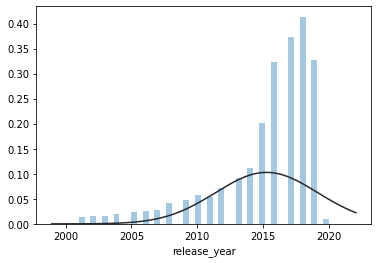

In [81]:
from scipy.stats import norm

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

#distplot()集合了matplotlib的hist()與核函數估計kdeplot的功能，
#增加了rugplot分佈觀測條顯示與利用scipy庫fit擬合參數分佈的新穎用途。
#fit：控制擬合的參數分佈圖形，能夠直觀地評估它與觀察數據的對應關係(黑色線條為確定的分佈)

## 建立內容類型的數據框

In [82]:
#導入 sklearn 的前處理套件, 將元素進行二元變換 , 輸入的資料會轉換成一個 一維 classes_
#每組資料會轉換成和 classes_ 相同大小的一維陣列
#如果資料有對應到 classes_  就為 1 否則為 0

from sklearn.preprocessing import MultiLabelBinarizer # 類似 one-hot encoding

In [83]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [89]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    print(genres_df.columns)
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [90]:
top_genres(movie_df, title='Top Movies Genres')

Index(['Action & Adventure', 'Anime Features', 'Children & Family Movies',
       'Classic Movies', 'Comedies', 'Cult Movies', 'Documentaries', 'Dramas',
       'Faith & Spirituality', 'Horror Movies', 'Independent Movies',
       'International Movies', 'LGBTQ Movies', 'Movies', 'Music & Musicals',
       'Romantic Movies', 'Sci-Fi & Fantasy', 'Sports Movies',
       'Stand-Up Comedy', 'Thrillers'],
      dtype='object')


In [91]:
top_genres(show_df, title='Top TV Shows Genres')

Index(['Anime Series', 'British TV Shows', 'Classic & Cult TV',
       'Crime TV Shows', 'Docuseries', 'International TV Shows', 'Kids' TV',
       'Korean TV Shows', 'Reality TV', 'Romantic TV Shows',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows'],
      dtype='object')


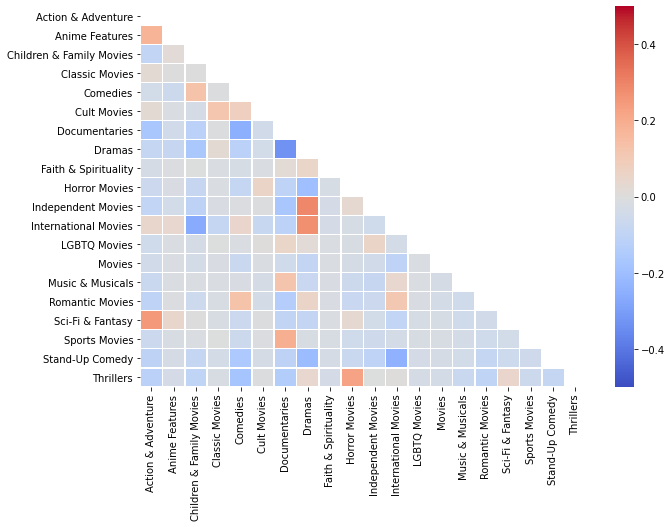

In [107]:
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True # Return the indices for the upper-triangle of arr.

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(
    movie_corr, 
    mask=movie_mask, 
    cmap= "coolwarm", 
    vmax=0.5, 
    vmin=-0.5, 
    center=0, 
    linewidths=0.5
#     cbar_kws={"shrink": 0.6}
)
plt.show()

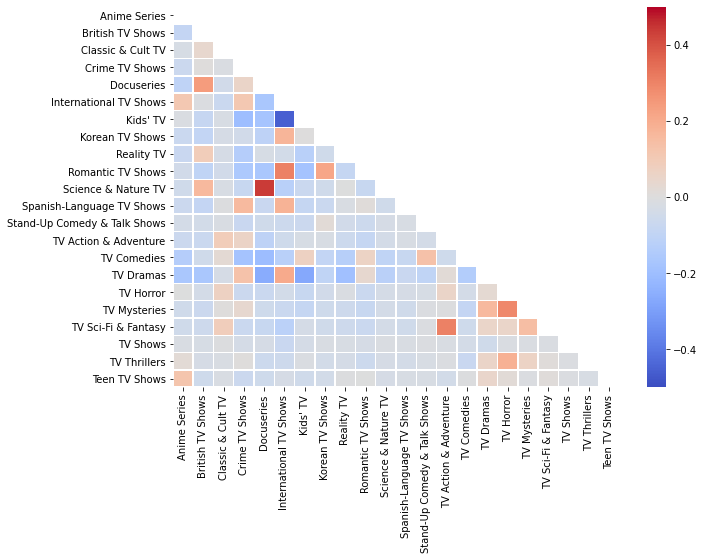

In [108]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(
    show_corr,
    mask=show_mask,
    cmap= "coolwarm", 
    vmax=0.5,
    vmin=-0.5,
    center=0,
    linewidths=0.5
#     cbar_kws={"shrink": 0.6}
)
plt.show()

In [ ]:
#使用文字雲, 找出最多被使用在資料集上的描述
#對文本數據中出現頻率較高的“關鍵詞”在視覺上的突出呈現，形成關鍵詞的渲染形成類似雲一樣的彩色圖片
#從而一眼就可以領略文本數據的主要表達意思

from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color='white', width=1200,  height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 分析 TV SHOW 系列季數

In [115]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()